### Notebook that generate the examples decribes in Residuals normalization



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [4]:
base = "../../"
output_irls_info = os.path.join(base,"data/regression_irls_info.tsv")
dataset_rppa_irls = os.path.join(base,"data/rppa_matched_irls.tsv.gz")
output_plots_path = os.path.join(base,"plots/supplementary_note/")

### Load datasets

In [5]:
df_diff_info = pd.read_csv(dataset_rppa_irls,sep="\t",compression="gzip")
df_quality_irls = pd.read_csv(output_irls_info,sep="\t")

###  aux functions

In [6]:
def calculate_values(query_data):
    mean_pre=np.nanmean(query_data["Raw_Residual"])
    std_pre=np.nanstd(query_data["Raw_Residual"])
    mean_post=np.nanmean(query_data["Stability_Change"])
    std_post=np.nanstd(query_data["Stability_Change"])
    print (mean_pre,std_pre,mean_post,std_post)
def Weighted_R(x,y):
    pvalue,R = list(df_quality_irls[(df_quality_irls["Cancer_Type"]==cancer)&(df_quality_irls["Protein"]==protein)][["Pvalue","R_value"]].values)[0]
    return (R,pvalue)

# High correlation, high dispersion RNA (Supplementary Figure Methods 1 a)

/home/fran/Downloads/yes/envs/regression/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


0.014924955175214576 0.22030273179374749 0.1754286362536692 2.589448835713461


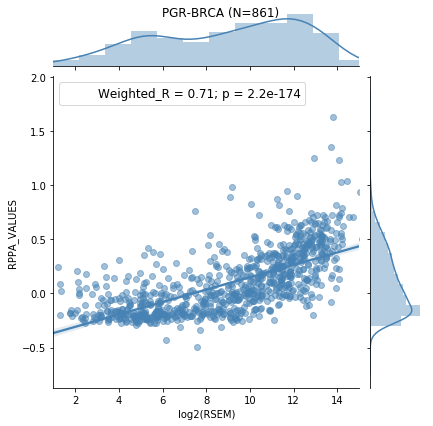

In [7]:
cancer="BRCA"
protein="PR"
hugo="PGR"
query_data=df_diff_info[(df_diff_info["Cancer_Type"]==cancer)&(df_diff_info["Protein"]==protein)&(df_diff_info["Phenotype"]=="WT")&(df_diff_info["CNA"]<2)&(~df_diff_info["Altered_E3_Ligases"])]
g = sns.JointGrid(x="log2(RSEM)", y="RPPA_VALUES", data=query_data,xlim=(1,15),)
g = g.plot_joint(sns.regplot,robust=True,scatter_kws={'alpha':0.5},color="#4682B4")
g = g.plot_marginals(sns.distplot,color="#4682B4")
#g = g.annotate(Weighted_IRLS,template="{stat}: {val:.2f}",stat="$R$", )
g = g.annotate(Weighted_R,loc="upper left", fontsize=12)
g.fig.suptitle("PGR"+"-"+cancer+ " (N="+str(query_data.shape[0])+")")
g.savefig(output_plots_path+"/"+protein+"_"+cancer+"_High_Dispersion_RNA.pdf",dpi=800)
calculate_values(query_data)

# High correlation, low dispersion RNA  (Supplementary Figure Methods 1 b)

/home/fran/Downloads/yes/envs/regression/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


0.0037799124428318084 0.14462223867208754 0.006236011052878669 0.23859438346554435


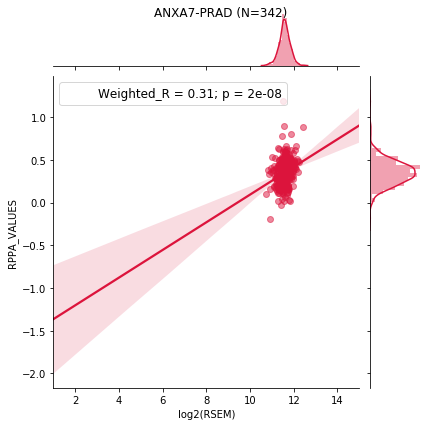

In [15]:
cancer="PRAD"
protein="ANNEXINVII"
hugo="ANXA7"
query_data=df_diff_info[(df_diff_info["Cancer_Type"]==cancer)&(df_diff_info["Protein"]==protein)&(df_diff_info["Phenotype"]=="WT")&(df_diff_info["CNA"]<2)&(~df_diff_info["Altered_E3_Ligases"])]
g = sns.JointGrid(x="log2(RSEM)", y="RPPA_VALUES", data=query_data,xlim=(1,15))
g = g.plot_joint(sns.regplot,robust=True,scatter_kws={'alpha':0.5},color="#DC143C")
g = g.plot_marginals(sns.distplot,color="#DC143C")
#g = g.annotate(Weighted_IRLS,template="{stat}: {val:.2f}",stat="$R$", )
g = g.annotate(Weighted_R,loc="upper left", fontsize=12)
g.fig.suptitle("ANXA7"+"-"+cancer+ " (N="+str(query_data.shape[0])+")")
g.savefig(output_plots_path+protein+"_"+cancer+"_Low_Dispersion_RNA.pdf",dpi=800)
calculate_values(query_data)

In [9]:
cancer="BRCA"
protein="PR"
std_rppa_1 = df_quality_irls[(df_quality_irls["Cancer_Type"]==cancer)&(df_quality_irls["Protein"]==protein)]["STD_RNA"].values[0]
query_data1=df_diff_info[(df_diff_info["Cancer_Type"]==cancer)&(df_diff_info["Protein"]==protein)&(df_diff_info["Phenotype"]=="WT")&(df_diff_info["CNA"]<2)&(~df_diff_info["Altered_E3_Ligases"])]
cancer="PRAD"
protein="ANNEXINVII"
std_rppa_2 = df_quality_irls[(df_quality_irls["Cancer_Type"]==cancer)&(df_quality_irls["Protein"]==protein)]["STD_RNA"].values[0]
query_data2=df_diff_info[(df_diff_info["Cancer_Type"]==cancer)&(df_diff_info["Protein"]==protein)&(df_diff_info["Phenotype"]=="WT")&(df_diff_info["CNA"]<2)&(~df_diff_info["Altered_E3_Ligases"])]

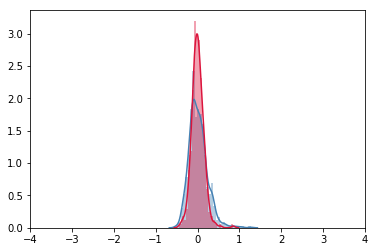

In [10]:
g = sns.distplot(query_data1["Raw_Residual"].values,color="#4682B4")
g = sns.distplot(query_data2["Raw_Residual"].values,color="#DC143C")
g.set_xlim(-4,4)
g.get_figure().savefig(output_plots_path+"/dist_raw_rna.pdf",dpi=800)

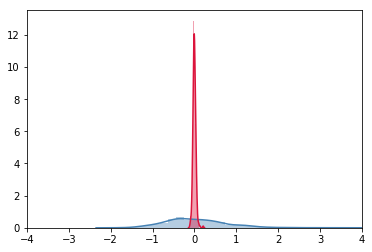

In [11]:
g = sns.distplot([x*std_rppa_1 for x in query_data1["Raw_Residual"].values],color="#4682B4")
g = sns.distplot([x*std_rppa_2 for x in query_data2["Raw_Residual"].values],color="#DC143C")
g.set_xlim(-4,4)
g.get_figure().savefig(output_plots_path+"/dist_normalized_rna.pdf",dpi=800)

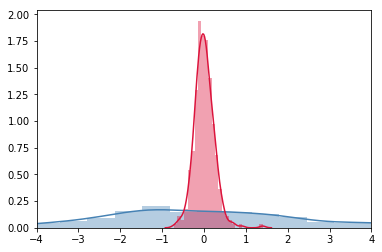

In [12]:
g = sns.distplot(query_data1["Stability_Change"].values,color="#4682B4")
g = sns.distplot(query_data2["Stability_Change"].values,color="#DC143C")
g.set_xlim(-4,4)
g.get_figure().savefig(output_plots_path+"/dist_final_rna.pdf",dpi=800)

# High dispersion RPPA, low correlation

/home/fran/Downloads/yes/envs/regression/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


-0.041323094629681235 1.1228239278571108 -0.03759974302655731 1.0216536667893492


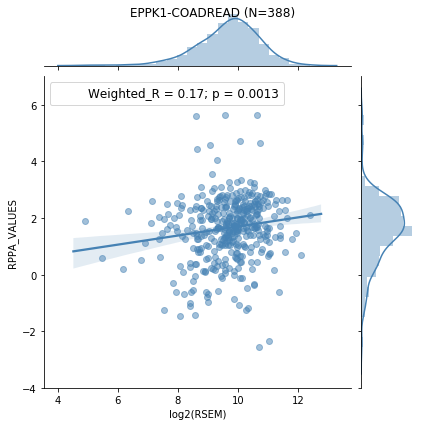

In [48]:
cancer="COADREAD"
protein="EPPK1"
hugo="EPPK1"
query_data=df_diff_info[(df_diff_info["Cancer_Type"]==cancer)&(df_diff_info["Protein"]==protein)&(df_diff_info["Phenotype"]=="WT")&(df_diff_info["CNA"]<2)&(~df_diff_info["Altered_E3_Ligases"])]
g = sns.JointGrid(x="log2(RSEM)", y="RPPA_VALUES", data=query_data,ylim=(-4,7))
g = g.plot_joint(sns.regplot,robust=True,scatter_kws={'alpha':0.5},color="#4682B4")
g = g.plot_marginals(sns.distplot,color="#4682B4")
#g = g.annotate(Weighted_IRLS,template="{stat}: {val:.2f}",stat="$R$", )
g = g.annotate(Weighted_R,loc="upper left", fontsize=12)
g.fig.suptitle(protein+"-"+cancer+ " (N="+str(query_data.shape[0])+")")
g.savefig(output_plots_path+"/"+protein+"_"+cancer+"_High_Dispersion_RPPA.pdf",dpi=800)
calculate_values(query_data)


# Low dispersion RPPA, low correlation

/home/fran/Downloads/yes/envs/regression/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


0.0043221545345893154 0.047185229638404456 0.10229288876593046 1.116737823270546


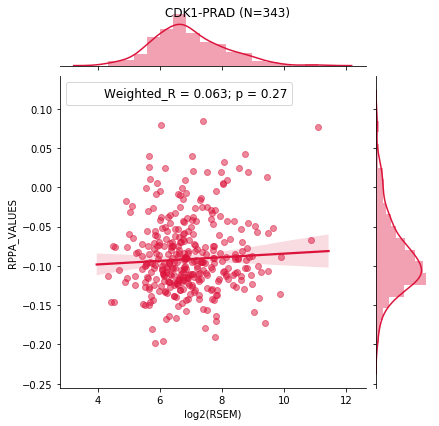

In [14]:
cancer="PRAD"
protein="CDK1"
query_data=df_diff_info[(df_diff_info["Cancer_Type"]==cancer)&(df_diff_info["Protein"]==protein)&(df_diff_info["Phenotype"]=="WT")&(df_diff_info["CNA"]<2)&(~df_diff_info["Altered_E3_Ligases"])]
g = sns.JointGrid(x="log2(RSEM)", y="RPPA_VALUES", data=query_data)
g = g.plot_joint(sns.regplot,robust=True,scatter_kws={'alpha':0.5},color="#DC143C")
g = g.plot_marginals(sns.distplot,color="#DC143C")
#g = g.annotate(Weighted_IRLS,template="{stat}: {val:.2f}",stat="$R$", )
g = g.annotate(Weighted_R,loc="upper left", fontsize=12)
g.fig.suptitle("CDK1"+"-"+cancer+ " (N="+str(query_data.shape[0])+")")
g.savefig(output_plots_path+"/"+protein+"_"+cancer+"_Low_Dispersion_RPPA2.pdf",dpi=800)
calculate_values(query_data)

In [51]:
cancer="COADREAD"
protein="EPPK1"
std_rppa_1 = df_quality_irls[(df_quality_irls["Cancer_Type"]==cancer)&(df_quality_irls["Protein"]==protein)]["STD_RPPA"].values[0]
query_data1=df_diff_info[(df_diff_info["Cancer_Type"]==cancer)&(df_diff_info["Protein"]==protein)&(df_diff_info["Phenotype"]=="WT")&(df_diff_info["CNA"]<2)&(~df_diff_info["Altered_E3_Ligases"])]
cancer="PRAD"
protein="CDK1"
std_rppa_2 = df_quality_irls[(df_quality_irls["Cancer_Type"]==cancer)&(df_quality_irls["Protein"]==protein)]["STD_RPPA"].values[0]
query_data2=df_diff_info[(df_diff_info["Cancer_Type"]==cancer)&(df_diff_info["Protein"]==protein)&(df_diff_info["Phenotype"]=="WT")&(df_diff_info["CNA"]<2)&(~df_diff_info["Altered_E3_Ligases"])]

In [52]:
print ("EPPK1",std_rppa_1)
print ("CDK1",std_rppa_2)

EPPK1 1.1351524464797182
CDK1 0.04732972475304124


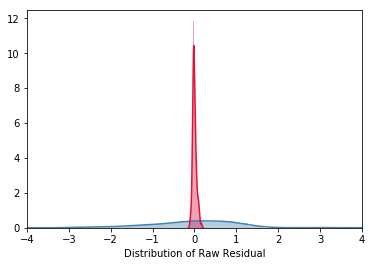

In [53]:
g = sns.distplot(query_data1["Raw_Residual"].values,color="#4682B4")
g = sns.distplot(query_data2["Raw_Residual"].values,color="#DC143C")
g.set_xlim(-4,4)
g.set_xlabel("Distribution of Raw Residual")
g.get_figure().savefig(output_plots_path+"dist_raw_rppa.pdf",dpi=800)

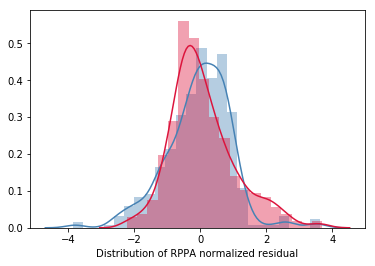

In [54]:
g = sns.distplot([x/std_rppa_1 for x in query_data1["Raw_Residual"].values],color="#4682B4")
g = sns.distplot([x/std_rppa_2 for x in query_data2["Raw_Residual"].values],color="#DC143C")
g.set_xlabel("Distribution of RPPA normalized residual")
g.get_figure().savefig(output_plots_path+"/dist_normalized_rppa.pdf",dpi=800)

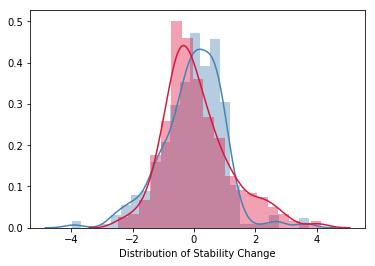

In [55]:
g = sns.distplot(query_data1["Stability_Change"].values,color="#4682B4")
g = sns.distplot(query_data2["Stability_Change"].values,color="#DC143C")
g.set_xlabel("Distribution of Stability Change")
g.get_figure().savefig(output_plots_path+"/dist_final_rppa.pdf",dpi=800)